# Objective : Fourier tranform of the Echos dataset

In [ ]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [ ]:
# import raw data and params.txt file

datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"
raw_data = load_data(path=datadir_path,as_df=False)
params_data = load_params(path=datadir_path)
# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading data into numpy array. Took 18.0s
Finsihed loading parameters file


In [113]:
params_data.columns

Index(['αx', 'αy', 'αz', 'ξ', 'p', 'Γ3', 'stencil_type', 's', 'p', 'd',
       'pulse90', 'pulse180'],
      dtype='object')

In [114]:
params_data[params_data['αz'] == params_data['αz'].max()] 

,αx,αy,αz,ξ,p,Γ3,stencil_type,s,p,d,pulse90,pulse180
2047,0.000706,0.000706,0.015,1.236349,2.0,0.0,0.0,1.0,0.0,0.0,1.570796,3.141593


In [117]:
params_data['αz'].max()

0.015

In [ ]:
print(raw_data.shape)
offset = 150
shifted_data, center = get_window(raw_data,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

(10500, 942)
The Echo pulse occurs at timestep: 628


## Fourier tranform

In [ ]:
from numpy.fft import fftfreq, fft,fftshift

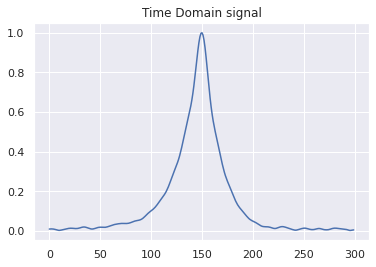

In [115]:
plt.plot(rscl_data[2047,:])
plt.title("Time Domain signal")
plt.show()

In [ ]:
t_max = 300*1e-6
t_envelope = 1/(1+np.exp(-0.1 *(t-120)))  #How did the parameter 120 come up?
t_envelope *= t_envelope[::-1] 

In [118]:
def ft_window(timewindow:np.ndarray, zeros_pow:int):
    
    N = timewindow.shape[0]
    t_max = 300*1e-6

    # Envelope
    t = np.linspace(0,t_max,N)
    t_envelope = 1/(1+np.exp(-0.1 *(t-120)))  #How did the parameter 120 come up?
    t_envelope *= t_envelope[::-1] 

    # Padding (done in fullsignal section)
    #zeros_pow (function param)

    # frequency axis
    Fs = 1/t[1]-t[0]  # sampling frequency
    delta_f = Fs/N  #frequency bin

    #freq_ax = ((np.arange(0,N-1) + 1/2)/N - 1/2)*Fs  #How did this come up?
    

    ### FFT
    signal = t_envelope*timewindow
    fullsignal = np.pad(signal, (2**zeros_pow), 'constant')
    fsignal_size = fullsignal.shape[0]
    freq_ax = np.linspace(0,(fsignal_size-1)*delta_f, int(fsignal_size)) + 10e6 - (fsignal_size-1)*delta_f/2

    freq_signal = fftshift(fft(fftshift(fullsignal)))

    return  freq_ax, abs(freq_signal)

In [119]:
freq_ax, freq_signal = ft_window(rscl_data[547,:],7)

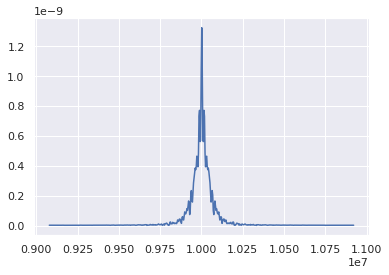

In [120]:
plt.plot(freq_ax, freq_signal)